In [1]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [2]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/' 
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [3]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

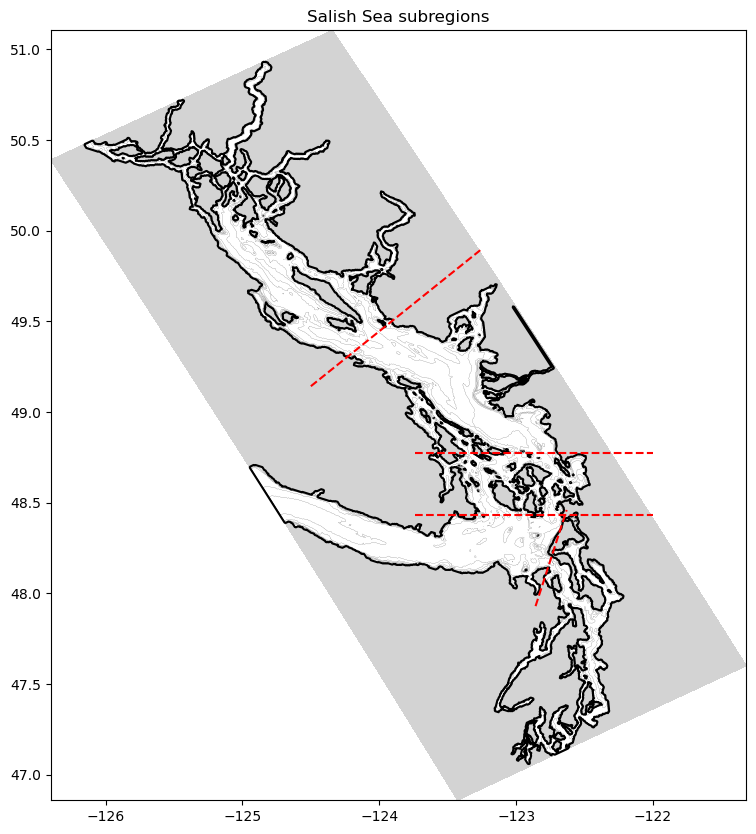

In [4]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [5]:
def counting(DS,month,axs,fact=1):
    DSb = DS[DS.status==2]
    DSe = DS[DS.status==3]
    DSs = DS[DS.status==1]
    count = []
    countb = []
    counte = []
    depthb = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DS.time)+i*6*3600
        count.append(len(DSs[DSs.time == times]))
        counte.append(len(DSe[DSe.time == times]))
        countb.append(len(DSb[DSb.time == times]))
        depthb.append(np.mean(DSs[DSs.time == times].z*DSs[DSs.time == times].fact))
    axs[0,0].plot(x2,np.array(count)/fact,label = month)
    axs[1,0].plot(x2,np.array(countb)/fact,'--',label = 'Beached')
    twin3.plot(x2,np.array(counte)/fact,label = ' Sedimented')
    axs[1,0].set_ylim([-1e4,6e4])
    twin3.set_ylim([-1e4,6e4])
    beached = [(c - countb[i-1])*4/(count[i-1]) for i,c in enumerate(countb)]#*4 to give the units in day-1
    sediment = [(c - counte[i-1])*4/(count[i-1]) for i,c in enumerate(counte)]
    beached = np.array(beached)
    for i,b in enumerate(beached):
        if b==0:
            beached[i]=(beached[i-1]+beached[i+1])/2
    sediment = np.array(sediment)
    for i,b in enumerate(sediment):
        if b==0:
            sediment[i]=(sediment[i-1]+sediment[i+1])/2
    axs[0,1].plot(moving_average(x2[1:],10),moving_average(1/beached[1:],10),'-',label = 'Beaching rate')
    # twin1.plot(x2,depthb,'--',la(bel = 'Avg Depth')
    axs[1,1].plot(moving_average(x[1:],10),moving_average(1/sediment[1:],10),label = 'Sedimentation rate')
    return #count,counte,countb,beached,sediment

In [6]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Lori_obs = pd.read_csv('Loridata.csv')
Time=np.linspace(0,365,8017)

In [7]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',1],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

sub_areas=['Puget','JdF','Haro','NSoG','CSSoG']
def cutting(data,area):
    if area=='Puget':
        data_new = data[data.lat<48.43]
        data_new = data_new[data_new.lat<(7/3)*data_new.lon+334.6]
    elif area=='JdF':
        data_new = data[data.lat<48.43]
        data_new = data_new[data_new.lat>(7/3)*data_new.lon+334.6]
    elif area=='Haro':  
        data_new = data[data.lat<48.774]
        data_new = data_new[data_new.lat>48.43]  
        data_new = data_new[data_new.lon<-123]  
        data_new = data_new[data_new.lon>-123.456] 

    elif area=='Haro2':  
        data_new = data[data.lat<48.774]
        data_new = data_new[data_new.lat>48.43]  
        
    elif area=='NSoG':
        data_new = data[data.lat>(20/33)*data.lon+124.597]
    elif area=='CSSoG': 
        data_new = data[data.lat>48.774] 
        data_new = data_new[data_new.lat<(20/33)*data_new.lon+124.597]
    else:
        print('Unrecognized subarea')  
    return data_new


Text(0.5, 1.0, 'Count particles')

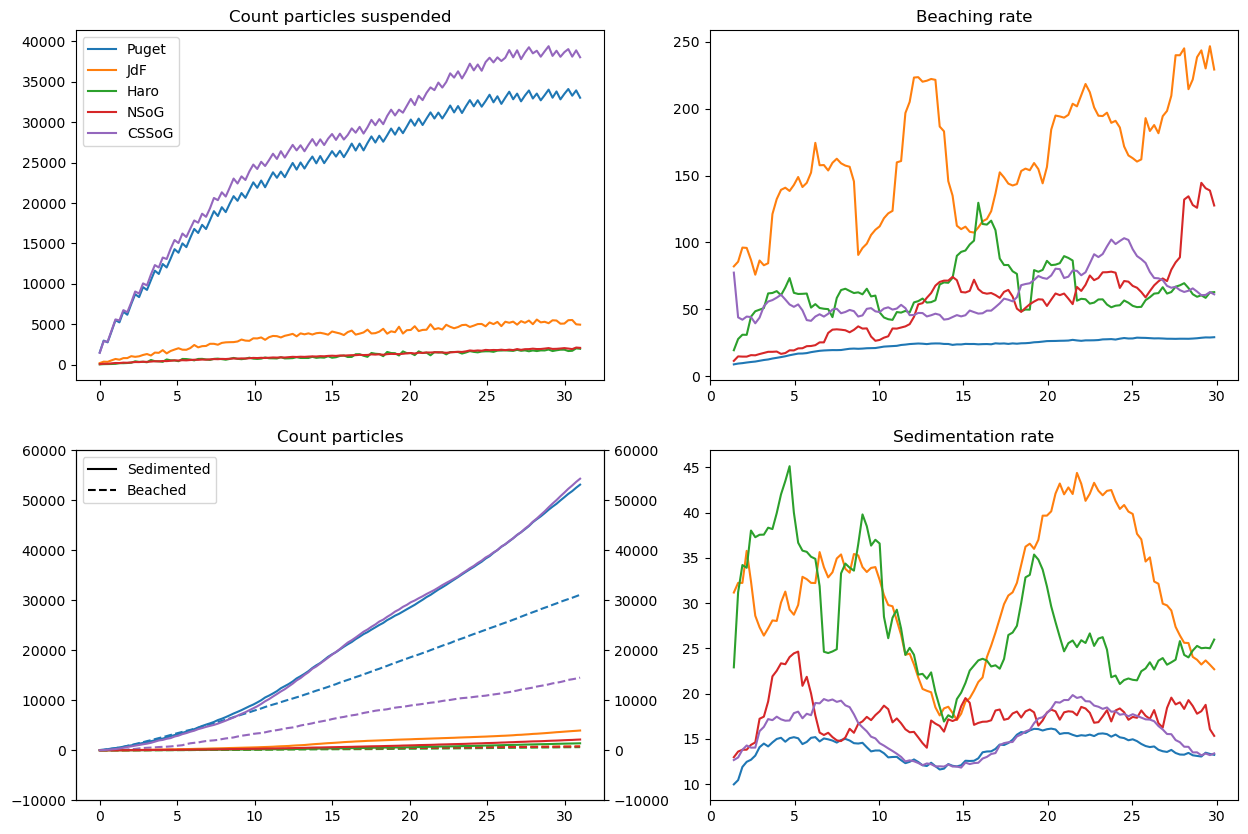

In [8]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
twin3 = axs[1,0].twinx()
alpha = '5,000 s'
ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
x = np.linspace(0,31,ds.dims['obs']-1)
x2 = np.linspace(0,31,ds.dims['obs']-1)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
for area in sub_areas:
    DSn = cutting(DS,area)
    counting(DSn,area,axs,runs[alpha][1])
axs[0,0].legend()
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='-'),
                plt.Line2D([0], [0], color='black', linestyle='--')]
axs[1,0].legend(legend_lines,['Sedimented','Beached'], loc = 'upper left')
axs[0,1].set_title('Beaching rate')
axs[1,1].set_title('Sedimentation rate')
axs[0,0].set_title('Count particles suspended')
axs[1,0].set_title('Count particles')
#axs[0,1].set_yscale('log')
#axs[1,1].set_yscale('log')

In [9]:
def finder(jjii,lati,loni):
    if type(lati) is list:
        #print('list of coordinates')
        i = []
        j = []
        for ni,lat in enumerate(lati):
            j.append([jjii.jj.sel(lats=lat, lons=loni[ni], method='nearest').item()][0])
            i.append([jjii.ii.sel(lats=lat, lons=loni[ni], method='nearest').item()][0])
    else:
        j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
        i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [10]:
np.average(Lori_obs['Concmean'])*20 #!Lori estimated that only 5% of fibers are recovered.

68.65973127346882

In [11]:
def artificial_hr(var,Ni,mask):    
    new_conc = np.zeros_like(mask.tmask[0,...],dtype='f')
    for i in range(new_conc.shape[1]):
        for j in range(new_conc.shape[2]):
            new_conc[:,i,j]=var[:,int(i/Ni),int(j/Ni)]
    return new_conc

In [12]:
obs=list(Lori_obs.groupby(by='Station')['Concmean'].mean())
latobs =list(Lori_obs.groupby(by='Station')['Lat'].mean())
lonobs =list(Lori_obs.groupby(by='Station')['Long'].mean())

For alpha of 250 s the estimated average concentration of the selected area is 11.219572519361048 MF/m3
For alpha of 500 s the estimated average concentration of the selected area is 14.109278750248402 MF/m3
For alpha of 1,000 s the estimated average concentration of the selected area is 17.199262706061646 MF/m3
For alpha of 2,500 s the estimated average concentration of the selected area is 22.154779885730807 MF/m3
For alpha of 5,000 s the estimated average concentration of the selected area is 25.536005649179796 MF/m3
For alpha of 10,000 s the estimated average concentration of the selected area is 28.61700990481349 MF/m3
For alpha of 50,000 s the estimated average concentration of the selected area is 31.868136979797743 MF/m3


Text(0, 0.5, 'Average concentration [MF/m3]')

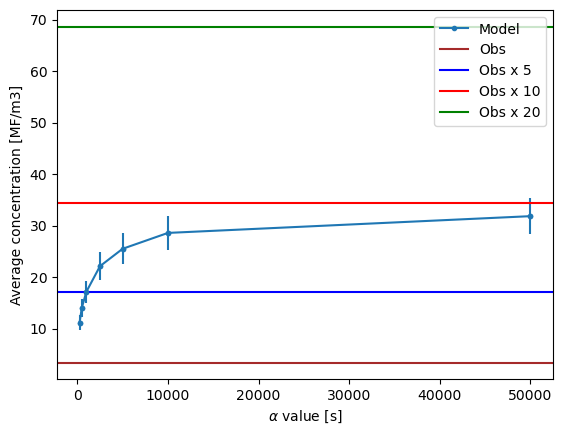

In [13]:
def modelvsobs(j,i,conc,ni=0):
    CONC = []
    for ind,ii in enumerate(i):
        if ni ==0:
            CONC.append(np.sum(conc[:6,int(j[ind]/3),int(ii/3)],axis=0)/5)
        else:
            CONC.append(np.apply_over_axes(np.sum,conc[:6,int(j[ind]/3)-ni:int(j[ind]/3)+ni,int(ii/3)-ni:int(ii/3)+ni],[0,1,2])/(5*(1+ni*2)**2))
    return np.mean(CONC),np.std(CONC)/len(CONC)


iii = [250,500,1000,2500,5000,10000,50000]
NNstdl = []
NNl = []
j,i=finder(jjii,latobs,lonobs)

for alpha in runs: 
    CONC = np.load(path_runs+runs[alpha][0].split('.')[0]+'.npy')*13.7/runs[alpha][1]
    NN,Nstd = modelvsobs(j,i,CONC,5)
    NNstdl.append(Nstd)
    NNl.append(NN)
    print(f'For alpha of {alpha} the estimated average concentration of the selected area is {NN} MF/m3')
plt.plot(iii,NNl,'.-',label='Model')
plt.errorbar(iii, NNl, NNstdl, linestyle='None', color= 'tab:blue',marker='.')
plt.axhline(y=np.average(Lori_obs['Concmean']),c='brown',label='Obs')
plt.axhline(y=np.average(Lori_obs['Concmean'])*5,c='b',label='Obs x 5')
plt.axhline(y=np.average(Lori_obs['Concmean'])*10,c='r',label='Obs x 10')
plt.axhline(y=np.average(Lori_obs['Concmean'])*20,c='g',label='Obs x 20')
plt.legend(loc='upper right')
plt.xlabel(r'$\alpha$ value [s]')
plt.ylabel('Average concentration [MF/m3]')

For alpha of Jan the estimated average concentration of the selected area is 25.536005649179796 MF/m3
For alpha of Feb the estimated average concentration of the selected area is 19.660922422219397 MF/m3
For alpha of Mar the estimated average concentration of the selected area is 22.194028303829327 MF/m3
For alpha of Jun the estimated average concentration of the selected area is 11.605470027780994 MF/m3
For alpha of Jul the estimated average concentration of the selected area is 13.414579191694092 MF/m3
For alpha of Aug the estimated average concentration of the selected area is 15.323153547793686 MF/m3


Text(0, 0.5, 'Average concentration [MF/m3]')

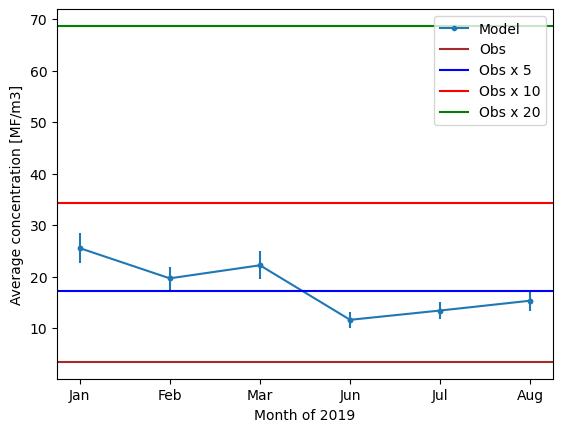

In [14]:
def modelvsobs(j,i,conc,ni=0):
    CONC = []
    for ind,ii in enumerate(i):
        if ni ==0:
            CONC.append(np.sum(conc[:6,int(j[ind]/3),int(ii/3)],axis=0)/5)
        else:
            CONC.append(np.apply_over_axes(np.sum,conc[:6,int(j[ind]/3)-ni:int(j[ind]/3)+ni,int(ii/3)-ni:int(ii/3)+ni],[0,1,2])/(5*(1+ni*2)**2))
    return np.mean(CONC),np.std(CONC)/len(CONC)


iii = ['Jan','Feb','Mar','Jun','Jul','Aug']
NNstdl = []
NNl = []

for alpha in months: 
    CONC = np.load(path_runs+months[alpha][0].split('.')[0]+'.npy')*13.7/1
    NN,Nstd = modelvsobs(j,i,CONC,5)
    NNstdl.append(Nstd)
    NNl.append(NN)
    print(f'For alpha of {alpha} the estimated average concentration of the selected area is {NN} MF/m3')
plt.plot(iii,NNl,'.-',label='Model')
plt.errorbar(iii, NNl, NNstdl, linestyle='None', color= 'tab:blue',marker='.')
plt.axhline(y=np.average(Lori_obs['Concmean']),c='brown',label='Obs')
plt.axhline(y=np.average(Lori_obs['Concmean'])*5,c='b',label='Obs x 5')
plt.axhline(y=np.average(Lori_obs['Concmean'])*10,c='r',label='Obs x 10')
plt.axhline(y=np.average(Lori_obs['Concmean'])*20,c='g',label='Obs x 20')
plt.legend(loc='upper right')
plt.xlabel(r'Month of 2019')
plt.ylabel('Average concentration [MF/m3]')

In [15]:
np.average(Lori_obs['Concmean'])*5 #!Lori estimated that only 5% of fibers are recovered.

17.164932818367205

Text(0.5, 1.0, 'obs vs model')

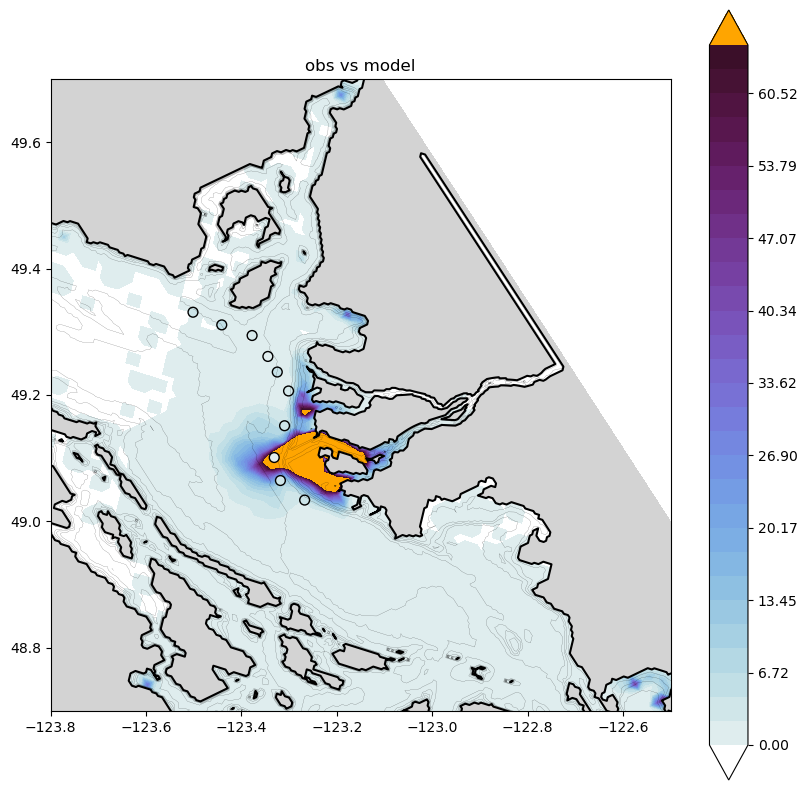

In [17]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense
levels = np.linspace(1e-5,65,30)
fig, ax = plt.subplots(1,1,figsize=(10, 10))
conc = np.load(path_runs+'Run_Enero20190101_.npy')
conc2 = np.load(path_runs+'Run_Febrero20190201_.npy')
conc3 = np.load(path_runs+'Run_Marzo20190301_.npy')
conc_winter = (conc + conc2 + conc3)/3

conc = np.load(path_runs+'Run_Junio20190601_.npy')
conc2 = np.load(path_runs+'Run_Julio20190701_.npy')
conc3 = np.load(path_runs+'Run_Agosto20190801_.npy')
conc_summer = (conc + conc2 + conc3)/3
CONC = 13.7*(conc_winter + conc_summer)/2
Ni = 3
aa = ax.contourf(coords.nav_lon[::Ni,::Ni], coords.nav_lat[::Ni,::Ni],np.sum(CONC[:5,:,:],axis=0)/5,levels=levels,extend='both',cmap=cmocean.cm.dense)
ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
sc=plt.scatter(lonobs,latobs,s = 50, c = np.array(obs),cmap=cmocean.cm.dense,vmax=65,vmin=1e-5,edgecolors='black')
plt.colorbar(aa)
aa.cmap.set_over('orange')
aa.cmap.set_under('white')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
plt.ylim([48.7,49.7])
plt.xlim([-123.8,-122.5])
plt.title('obs vs model')

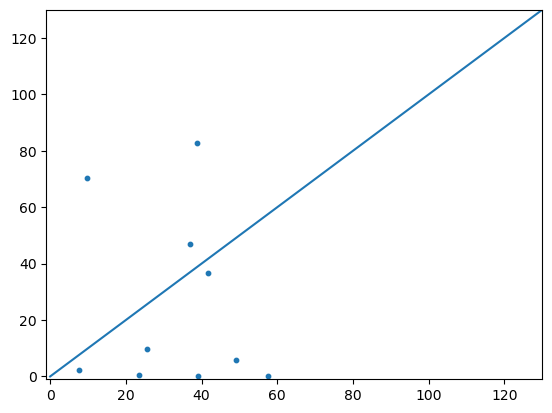

In [39]:
conc = np.load(path_runs+runs['5,000 s'][0].split('.')[0]+'.npy')*13.7/runs['5,000 s'][1]
ni = 5
CONC = []
for ind,ii in enumerate(i):
        if ni ==0:
            CONC.append(np.sum(conc[:6,int(j[ind]/3),int(ii/3)],axis=0)/5)
        else:
            CONC.append(np.apply_over_axes(np.sum,conc[:6,int(j[ind]/3)-ni:int(j[ind]/3)+ni,int(ii/3)-ni:int(ii/3)+ni],[0,1,2])/(5*(1+ni*2)**2))
plt.scatter(np.array(obs)*10,CONC,s= 10)
plt.xlim([-1,130])
plt.ylim([-1,130])
plt.plot(np.linspace(0,130,2),np.linspace(0,130,2))